In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from scipy.stats import norm
from sklearn.metrics.pairwise import nan_euclidean_distances

In [3]:
# replacing null values for each feature with imputed values

data = pd.read_csv("data.csv", sep=',')
data_original = data.copy()
data.drop(['Unnamed: 0','WindDirection'],axis=1,inplace=True)
col = 0 # keep track of features
for column in data:
    row=0 #keep track of rows in similarity array
    nullTable = data[data[column].isnull()] # Dataframe with null values
    notNullTable = data[data[column].notnull()] # Dataframe with no null values
    
    similarityArray = nan_euclidean_distances(nullTable,notNullTable) # Array with the similarity distances value
   
    for x in similarityArray:
        minValIndex = np.argmin(x,axis=0) #finding minimum value from the similarity matrix
        similarValue = notNullTable[column].iloc[minValIndex]
        nullTable.iat[row,col] = similarValue  #replacing null values with calculated imputed values
        row+=1  #incrementing row value
    print("\n Imputed values for",column,"\n\n",nullTable) 
    col+=1
   
    


 Imputed values for maxO3 

      maxO3    T9   T12   T15  Ne9  Ne12  Ne15     Vx9    Vx12    Vx15  maxO3v
16    75.0  21.0  24.6  26.9  NaN   NaN   1.0 -0.3420     NaN -0.6840   121.0
17    84.0   NaN   NaN   NaN  NaN   NaN   NaN  0.0000  0.3473 -2.5712     NaN
24    63.0   NaN   NaN   NaN  NaN   NaN   NaN -5.6382 -3.8302 -4.5963    83.0
31    99.0  16.8  18.2  22.0  8.0   8.0   6.0  0.0000  0.0000  1.2856    79.0
32    99.0  20.8   NaN   NaN  NaN   3.0   4.0  0.0000  1.7101     NaN    93.0
41    76.0  16.9  19.1   NaN  5.0   NaN   6.0 -2.2981 -3.7588  0.0000    67.0
44    72.0   NaN  15.6   NaN  NaN   8.0   NaN     NaN -3.8302 -4.3301    63.0
50    83.0  19.0  22.5  24.1  NaN   NaN   NaN     NaN -1.0261  0.5209    81.0
62    59.0  18.6  18.7  17.8  8.0   8.0   8.0 -4.6985 -2.5000 -0.8682    63.0
80   160.0  20.1  22.9  27.6  8.0   8.0   6.0  1.2856 -1.7321 -0.6840     NaN
82   117.0  21.0  24.4   NaN  1.0   6.0   3.0  4.0000  4.0000  3.7588   114.0
83    76.0  16.9  17.8  20.6  NaN 

      maxO3    T9   T12   T15  Ne9  Ne12  Ne15     Vx9    Vx12    Vx15  maxO3v
4     94.0   NaN  20.5  20.4  1.0   NaN   NaN -0.5000 -2.9544 -4.3301   114.0
11    90.0  17.6  20.3  17.4  1.0   6.0   8.0     NaN -1.0419 -0.6946   101.0
13    70.0  17.1  18.2  18.0  6.0   7.0   NaN     NaN -7.8785 -5.1962    72.0
16     NaN  21.0  24.6  26.9  8.0   NaN   1.0 -0.3420     NaN -0.6840   121.0
17     NaN   NaN   NaN   NaN  3.0   NaN   NaN  0.0000  0.3473 -2.5712     NaN
19   146.0  23.6  28.6  28.4  8.0   NaN   NaN  1.0000 -1.9284 -1.2155   121.0
21   146.0   NaN   NaN   NaN  1.0   0.0   0.0  2.9544  6.5778     NaN   121.0
23    83.0  19.7  22.9  24.8  6.0   NaN   NaN -2.5981     NaN     NaN     NaN
24     NaN   NaN   NaN   NaN  6.0   NaN   NaN -5.6382 -3.8302 -4.5963    83.0
26    67.0   NaN  23.4  23.7  8.0   NaN   NaN -1.5321 -3.0642 -0.8682    81.0
28   106.0   NaN   NaN   NaN  3.0   0.0   1.0  2.8191  3.9392  3.4641    70.0
29   139.0   NaN  30.1  31.9  1.0   1.0   4.0  1.8794  2.0000  

      maxO3    T9   T12   T15  Ne9  Ne12  Ne15     Vx9    Vx12    Vx15  maxO3v
3    114.0  16.2  19.7   NaN  1.0   1.0   0.0  0.0000  0.3473 -0.1736    92.0
11    90.0  17.6  20.3  17.4  NaN   6.0   8.0  0.0000 -1.0419 -0.6946   101.0
13    70.0  17.1  18.2  18.0  NaN   7.0   NaN -5.1962 -7.8785 -5.1962    72.0
18   121.0  19.7  24.2  26.9  2.0   1.0   0.0  1.8794     NaN  2.0000    81.0
20   121.0  20.4  25.2  27.7  1.0   0.0   0.0  0.0000 -0.5209  1.0261   146.0
36    77.0  19.4  20.7  22.5  7.0   8.0   NaN -0.8682 -5.6382 -9.0000    88.0
44     NaN   NaN  15.6   NaN  NaN   8.0   NaN -3.0000 -3.8302 -4.3301    63.0
46    88.0   NaN  20.3   NaN  NaN   NaN   NaN  1.2856 -3.4641     NaN    92.0
48    72.0  18.6  21.9  23.6  4.0   7.0   6.0 -2.2981 -1.9696     NaN    66.0
50     NaN  19.0  22.5  24.1  NaN   NaN   NaN -2.5981 -1.0261  0.5209    81.0
51   149.0  19.9  26.9  29.0  3.0   4.0   NaN  0.0000 -0.9397 -0.6428    83.0
68    98.0   NaN   NaN   NaN  1.0   1.0   0.0 -0.3420 -1.5321 -

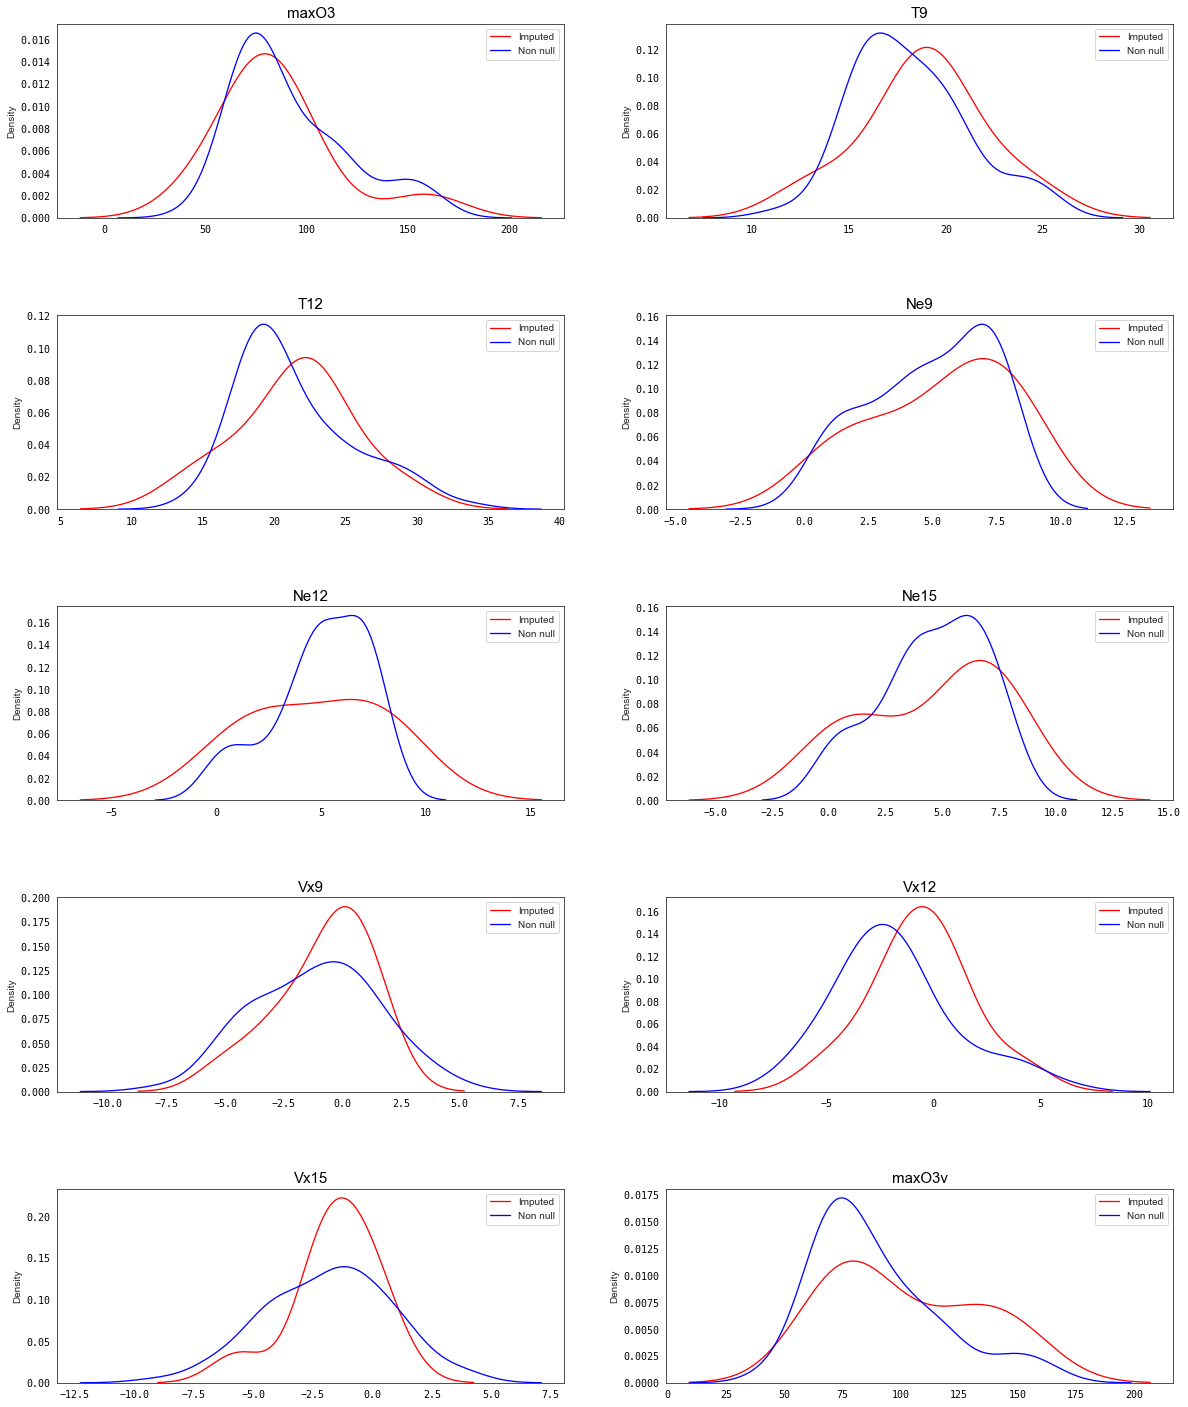

In [61]:
#distribution plot

p=1
#plot size
fig = plt.figure(figsize = (20,25))
# vertical space between plots
fig.subplots_adjust(hspace=0.5)

features = ["maxO3","T9","T12","Ne9","Ne12","Ne15","Vx9","Vx12","Vx15","maxO3v"]
for i in range(len(features)):
    plt.subplot(5, 2,p)
    sns.set_style("white")
    
    # plot imputed values
    a = sns.kdeplot(nullTable[features[i]], label = "Imputed",color = "r",linewidth = 1.3)
    # plot non missing values
    a1 = sns.kdeplot(notNullTable[features[i]], label = "Non null", color = "b",linewidth = 1.3)
    plt.xlabel('')
    plt.title(features[i],size = 15, color = 'black')
    plt.xticks(fontname = 'monospace', size = 10, color = 'black')
    plt.yticks(fontname = 'monospace', size = 10, color = 'black')
    plt.legend()
  
    p += 1  # p = p + 1